<a href="https://colab.research.google.com/github/SathzSenz/DL_LAb07/blob/main/Markov_Decision_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Decision Process (MDP)

### Ransalu Senanayake

In [ ]:
import copy
import timeit
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

Create the following grid world.

**States:** A 10x10 grid

**Actions:** Up, Down, Left, Right

**Tranistion probabilities:**
* 0.7 in the direction of action
* 0.1 in the three other directions
* The robot bounces back to the same state near edges

**Rewards:**
* (7,8) has a reward +10
* (2,7) has a reward +3
* (4,3) has a reward -5
* (7,3) has a reward -10
* No reward in other states

This example is based on Decision Making Under Uncertainty by M.J. Kochenderfer.

In [ ]:
#Let's define MDP paras
def createGrid10World():
    def xy2s(y, x):
        x = max(x, 0)
        y = max(y, 0)
        x = min(x, 9)
        y = min(y, 9)
        out = np.ravel_multi_index(np.array([x,y]), (10,10))
        return out

    def s2xy(s):
        x, y = np.unravel_index(s, (10,10))
        return y, x

    def gridPlot(ax, im, title='', cmap='Blues'):
        pl.imshow(im, interpolation='none', cmap=cmap, origin='lower')
        pl.colorbar()
        ax.set_xticks(np.arange(0, 10, 1));
        ax.set_yticks(np.arange(0, 10, 1));
        ax.set_xticklabels(np.arange(0, 10, 1));
        ax.set_yticklabels(np.arange(0, 10, 1));
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        pl.title(title);
        return

    A = ['left', 'right', 'up', 'down']
    S = np.arange(100)
    T = np.zeros((len(S), len(A), len(S)))
    R = np.zeros((len(S), len(A)))
    for s in S:
        x, y = s2xy(s)
        if x == 2 and y == 7:
            R[s, :] = 3
        elif x == 7 and y == 8:
            R[s, :] = 10
        else:
            if x == 7 and y == 3:
                R[s, :] = -10
            elif x == 4 and y == 3:
                R[s, :] = -5
            elif x == 0:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 0] = -0.7
            elif x == 9:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 1] = -0.7
            elif y == 0:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 3] = -0.7
            elif y == 9:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 2] = -0.7

            for a in A:
                if a == 'left':
                    T[s, 0, xy2s(x - 1, y)] += 0.7
                    T[s, 0, xy2s(x + 1, y)] += 0.1
                    T[s, 0, xy2s(x, y - 1)] += 0.1
                    T[s, 0, xy2s(x, y + 1)] += 0.1
                elif a == 'right':
                    T[s, 1, xy2s(x + 1, y)] += 0.7
                    T[s, 1, xy2s(x - 1, y)] += 0.1
                    T[s, 1, xy2s(x, y - 1)] += 0.1
                    T[s, 1, xy2s(x, y + 1)] += 0.1
                elif a == 'up':
                    T[s, 2, xy2s(x, y + 1)] += 0.7
                    T[s, 2, xy2s(x, y - 1)] += 0.1
                    T[s, 2, xy2s(x - 1, y)] += 0.1
                    T[s, 2, xy2s(x + 1, y)] += 0.1
                elif a == 'down':
                    T[s, 3, xy2s(x, y - 1)] += 0.7
                    T[s, 3, xy2s(x, y + 1)] += 0.1
                    T[s, 3, xy2s(x - 1, y)] += 0.1
                    T[s, 3, xy2s(x + 1, y)] += 0.1

    for a, c_x, c_y in [(0,0,0), (0,0,9),(1,9,0),(1,9,9),(2,0,9),(2,9,9),(3,0,0),(3,9,0)]:
        R[xy2s(c_x,c_y),a] = -0.8

    discount = 0.9

    nextStates = {}
    for si in range(len(S)):
        for ai in range(len(A)):
            nextStates[(si,ai)] = np.where((T[si, ai, :] != 0) == True)[0]

    return {'S':S, 'A':A, 'T':T, 'R':R, 'discount':discount, 'nextStates':nextStates, 'gridPlot':gridPlot, 'xy2s':xy2s, 's2xy':s2xy}

In [ ]:
class MDP():
    def __init__(self):
        pass

    def inbuilt_init(self, mdp_dict):
        self.S = mdp_dict['S']
        self.A = mdp_dict['A']
        self.T = mdp_dict['T']
        self.R = mdp_dict['R']
        self.discount = mdp_dict['discount']
        self.nextStates = mdp_dict['nextStates']
        self.gridPlot = mdp_dict['gridPlot']
        self.xy2s = mdp_dict['xy2s']
        self.s2xy = mdp_dict['s2xy']

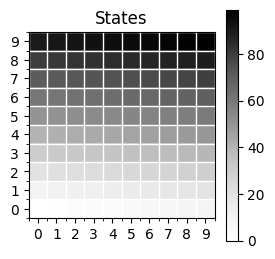

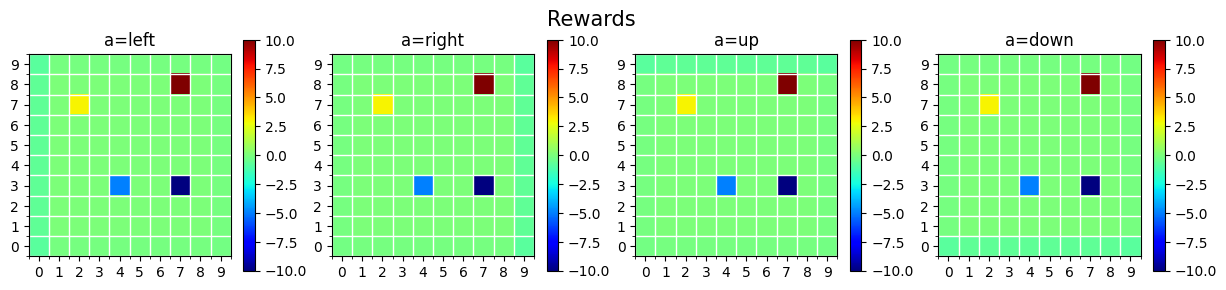

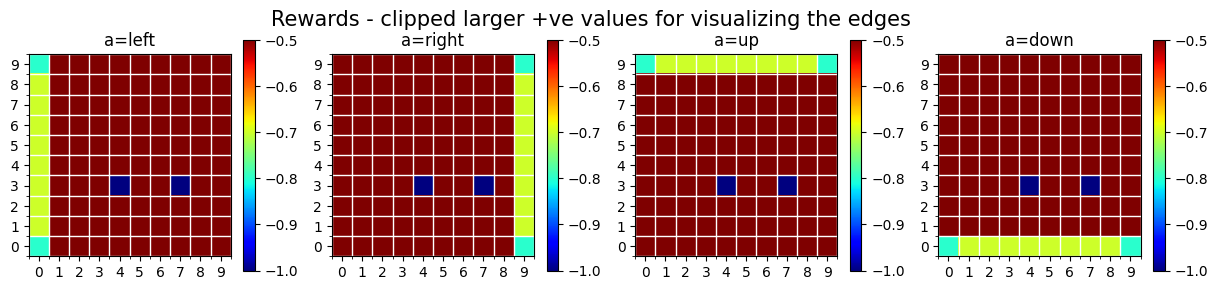

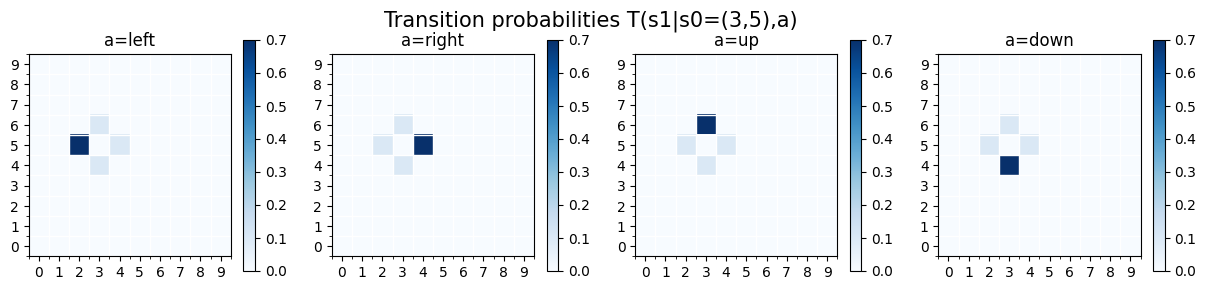

In [ ]:
#Define the MDP
mdp = MDP()
mdp.inbuilt_init(mdp_dict=createGrid10World())

#Plot states
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=mdp.S.reshape((10,10)), title='States', cmap='Greys')

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.R[:,a].reshape((10,10)), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards - clipped larger +ve values for visualizing the edges', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=np.clip(mdp.R[:,a].reshape((10,10)), -1, -0.5), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
s0_x, s0_y = 3, 5
s0 = mdp.xy2s(s0_x, s0_y)
pl.figure(figsize=(15,3))
pl.suptitle('Transition probabilities T(s1|s0=({},{}),a)'.format(s0_x, s0_y), fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title='a='+mdp.A[a], cmap='Blues')
pl.show()

In [ ]:
#An interactive plot of transition probabilities
def f(s0_x, s0_y, action):
    a = mdp.A.index(action)
    s0 = mdp.xy2s(int(s0_x), int(s0_y))
    pl.figure(figsize=(6,6))
    title = 'Transition probabilities T(s1|s0=({},{}),a={})'.format(int(s0_x),int(s0_y),action)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title=title, cmap='Blues')
    pl.show()

interactive_plot = interactive(f, s0_x='4', s0_y='5', action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']))
interactive_plot

interactive(children=(Text(value='4', description='s0_x'), Text(value='5', description='s0_y'), ToggleButtons(…

### 1. Policy evaluation

Computing the utility, U.

$U^\pi_k(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s' \mid s, \pi(s))U^\pi_{k-1}(s')$

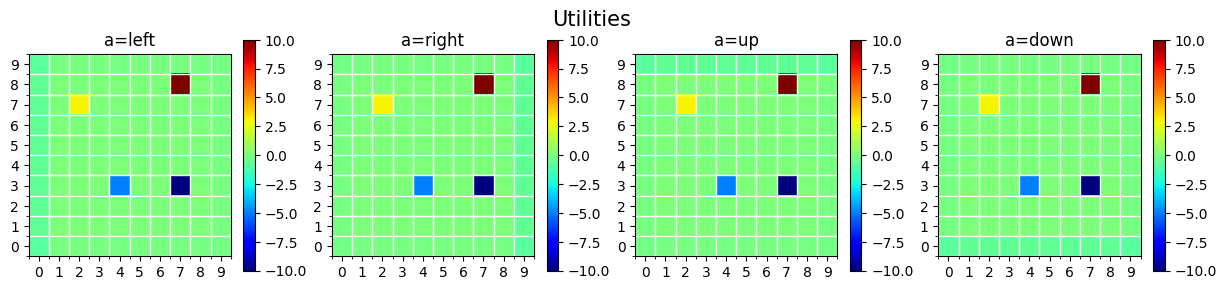

In [ ]:
def iterativePolicyEvaluation(mdp, policy, numIterations=10):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        for s in range(len(mdp.S)):
          # pick action from policy
          if isinstance(policy, (int, np.integer)):
              a = policy
          else:
              a = policy[s]
          # immediate reward
          r = mdp.R[s, a]
          # expected utility of next states
          exp = 0.0
          for s2 in mdp.nextStates[(s, a)]:
              exp += mdp.T[s, a, s2] * U_old[s2]
          U[s] = r + mdp.discount * exp
    return U

numIterations = 5
pl.figure(figsize=(15,3))
pl.suptitle('Utilities', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    U = iterativePolicyEvaluation(mdp=mdp, policy=a, numIterations=numIterations)
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='a='+mdp.A[a], cmap='jet')
pl.show()
#print(np.round(U.reshape(10,10),3))

In [ ]:
def f(action, numIter=1):
    U = iterativePolicyEvaluation(mdp, policy=mdp.A.index(action), numIterations=numIter)
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    pl.show()

interactive_plot = interactive(f, action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']),
                               numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(ToggleButtons(description='action', options=('left', 'right', 'up', 'down'), value='left…

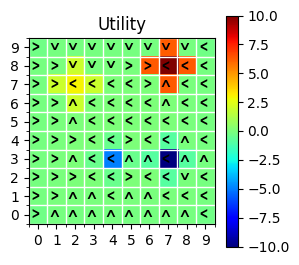

In [ ]:
#Value iteration
def valueIteration(mdp, numIterations=1):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        U_old = U.copy()
        for s in range(len(mdp.S)):
            U[s] = max([
                mdp.R[s, a] + mdp.discount * sum(
                    mdp.T[s, a, s2] * U_old[s2] for s2 in mdp.nextStates[(s, a)]
                ) for a in range(len(mdp.A))
            ])
    return U

def policyExtration(mdp, U):
    policy = np.zeros(len(mdp.S))
    for s in range(len(mdp.S)):
      action_values = []
      for a in range(len(mdp.A)):
          val = mdp.R[s, a] + mdp.discount * sum(
              mdp.T[s, a, s2] * U[s2] for s2 in mdp.nextStates[(s, a)]
          )
          action_values.append(val)
      policy[s] = np.argmax(action_values)
    return policy

U = valueIteration(mdp, numIterations=2)
policy = policyExtration(mdp, U=U)
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
for s in range(100):
    x, y = mdp.s2xy(s)
    if policy[s] == 0:
        m='\u02C2'
    elif policy[s] == 1:
        m='\u02C3'
    elif policy[s] == 2:
        m='\u02C4'
    elif policy[s] == 3:
        m='\u02C5'
    pl.text(x-0.5,y-1,m,color='k',size=20)
pl.show()

In [ ]:
def f(numIter=1):
    start_time = timeit.default_timer()
    U = valueIteration(mdp, numIterations=numIter)
    policy = policyExtration(mdp, U=U)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

### 2. Policy iteration

Policy evaluation can be used in policy iteration:
1. Given the current policy, compute U
2. Using U, compute a new policy

In [ ]:
def policyIteration(mdp, numIterations=1):
    U_pi_k = np.zeros(len(mdp.S)) #initial values
    pi_k = np.random.randint(low=0,high=4,size=len(mdp.S),dtype=int) #initial policy
    pi_kp1 = copy.copy(pi_k)
    for t in range(numIterations):
        for t in range(numIterations):
          #Policy Evaluation
          U_old = U_pi_k.copy()
          for s in range(len(mdp.S)):
              a = pi_k[s]
              U_pi_k[s] = mdp.R[s, a] + mdp.discount * sum(
                  mdp.T[s, a, s2] * U_old[s2] for s2 in mdp.nextStates[(s, a)]
              )

          #Policy Improvement
          for s in range(len(mdp.S)):
              action_values = []
              for a in range(len(mdp.A)):
                  val = mdp.R[s, a] + mdp.discount * sum(
                      mdp.T[s, a, s2] * U_pi_k[s2] for s2 in mdp.nextStates[(s, a)]
                  )
                  action_values.append(val)
              pi_kp1[s] = np.argmax(action_values)
          pi_k = pi_kp1.copy()
    return U_pi_k, pi_kp1

U_pi_k, pi_kp1 = policyIteration(mdp, numIterations=2)

Execution Times:
Value Iteration: 0.04 s
Policy Iteration: 1.059 s
Q-learning: 3.345 s


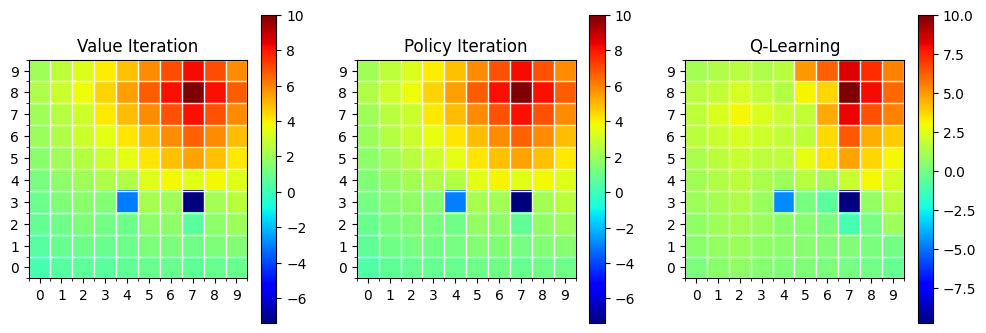

In [ ]:
import random

def q_learning(mdp, episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((len(mdp.S), len(mdp.A)))
    for ep in range(episodes):
        s = np.random.choice(mdp.S)   # random start state
        steps = 0
        while steps < 100:
            # epsilon-greedy action selection
            if np.random.rand() < epsilon:
                a = np.random.choice(len(mdp.A))
            else:
                a = np.argmax(Q[s, :])

            # --- handle case with no next states ---
            next_states = mdp.nextStates.get((s, a), [])
            if len(next_states) == 0:
                r = mdp.R[s, a]
                Q[s, a] = Q[s, a] + alpha * (r - Q[s, a])  # update with reward only
                break   # end episode if stuck

            # sample next state
            probs = mdp.T[s, a, next_states]
            probs = probs / np.sum(probs)   # normalize
            s_next = np.random.choice(next_states, p=probs)
            r = mdp.R[s, a]

            # Q-learning update
            Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s_next, :]) - Q[s, a])

            s = s_next
            steps += 1
    return Q

# --- Timing comparison ---
import time

# Value Iteration timing
start = time.time()
U_val = valueIteration(mdp, numIterations=20)
policy_val = policyExtration(mdp, U_val)
time_val = time.time() - start

# Policy Iteration timing
start = time.time()
U_pol, policy_pol = policyIteration(mdp, numIterations=20)
time_pol = time.time() - start

# Q-learning timing
start = time.time()
Q = q_learning(mdp, episodes=5000)
policy_q = np.argmax(Q, axis=1)
time_q = time.time() - start

print("Execution Times:")
print("Value Iteration:", round(time_val, 3), "s")
print("Policy Iteration:", round(time_pol, 3), "s")
print("Q-learning:", round(time_q, 3), "s")

# --- Plot comparison ---
pl.figure(figsize=(12,4))

pl.subplot(1,3,1)
mdp.gridPlot(ax=pl.gca(), im=U_val.reshape(10,10), title="Value Iteration", cmap="jet")

pl.subplot(1,3,2)
mdp.gridPlot(ax=pl.gca(), im=U_pol.reshape(10,10), title="Policy Iteration", cmap="jet")

pl.subplot(1,3,3)
mdp.gridPlot(ax=pl.gca(), im=np.max(Q, axis=1).reshape(10,10), title="Q-Learning", cmap="jet")

pl.show()


### Model-Based vs Model-Free Reinforcement Learning

**Model-Based RL**  
- The agent has full knowledge of the environment model:  
  - Transition probabilities `T(s,a,s')`  
  - Rewards `R(s,a)`  
- Uses algorithms like **Value Iteration** and **Policy Iteration**.  
- Planning-based: computes expected utilities and derives optimal policies.  
- Pros: Usually converges faster and requires fewer samples.  
- Cons: Needs an accurate model of the environment (not always available).

**Model-Free RL**  
- The agent does **not** know the transition model or rewards in advance.  
- Learns only from direct interaction with the environment.  
- Uses algorithms like **Q-Learning** and **SARSA**.  
- Trial-and-error learning: estimates action values by experience.  
- Pros: Works when the environment is unknown.  
- Cons: Typically slower to converge, needs more training episodes.

**Comparison in this lab:**  
- *Value Iteration* and *Policy Iteration* converge quickly because they use the full MDP model.  
- *Q-learning* requires many episodes to approximate the same policy but does not need the transition matrix.



In [ ]:
def f(numIter=1):
    start_time = timeit.default_timer()
    # code you want to evaluate
    value, policy = policyIteration(mdp, numIterations=numIter)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=value.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

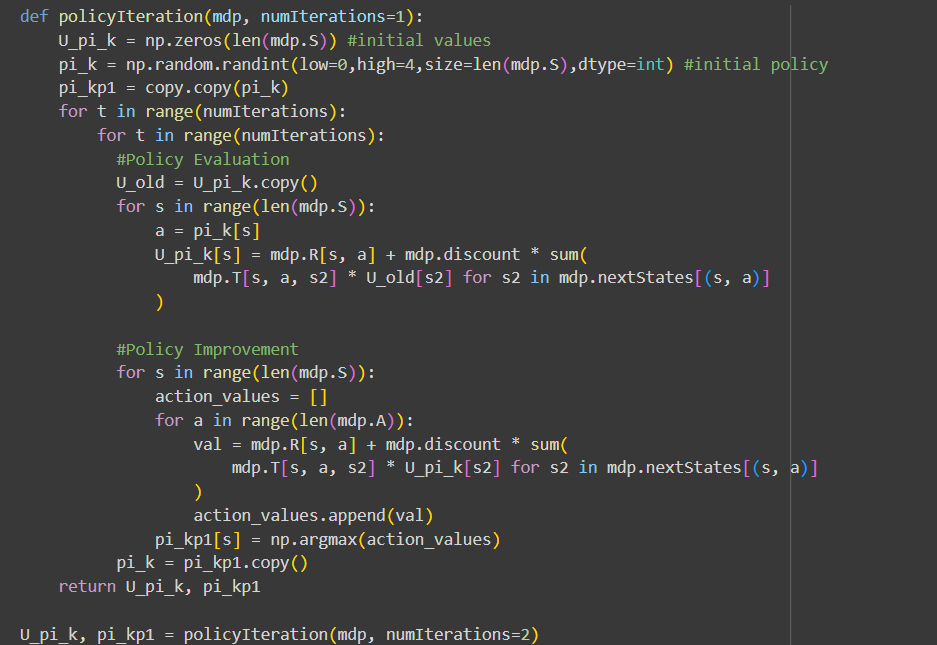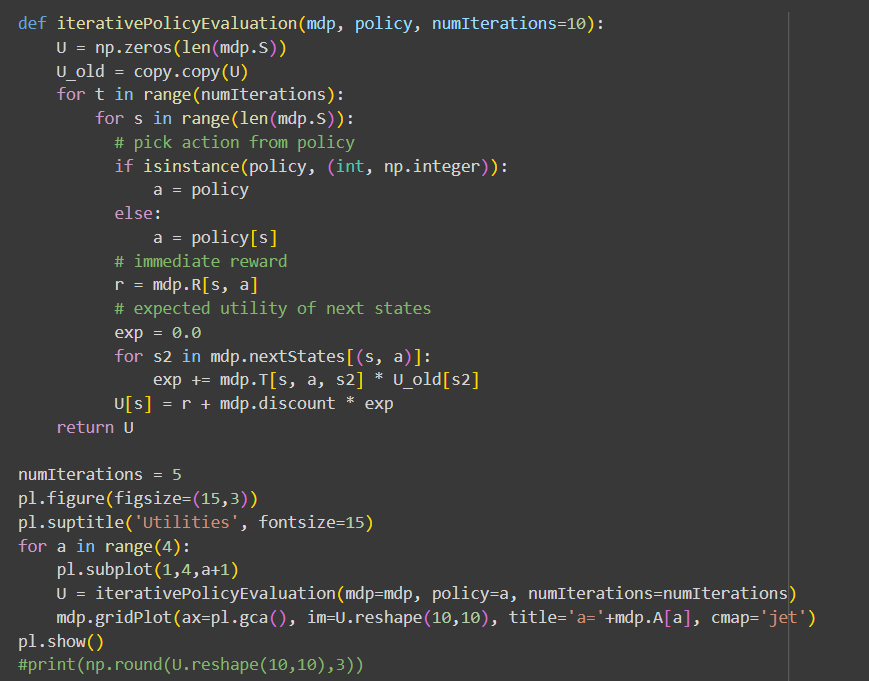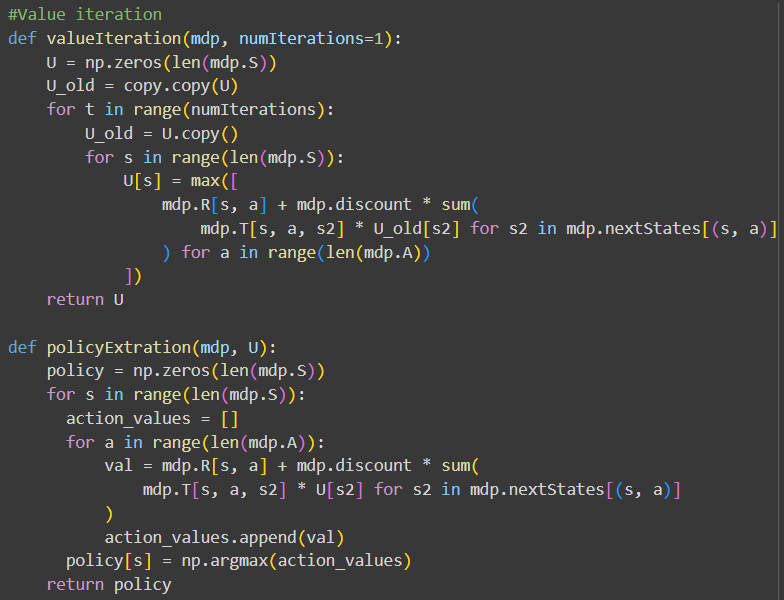

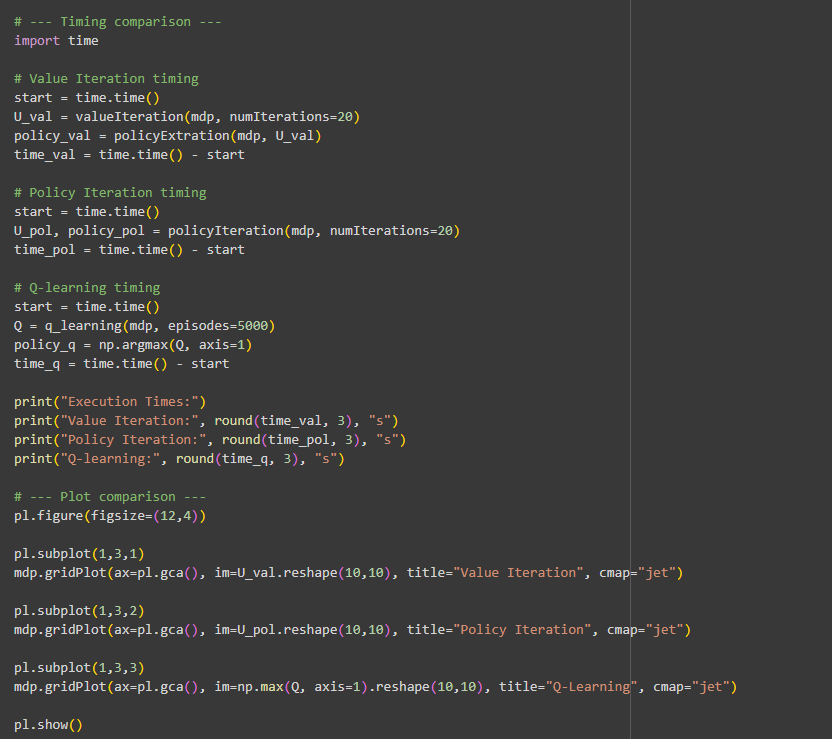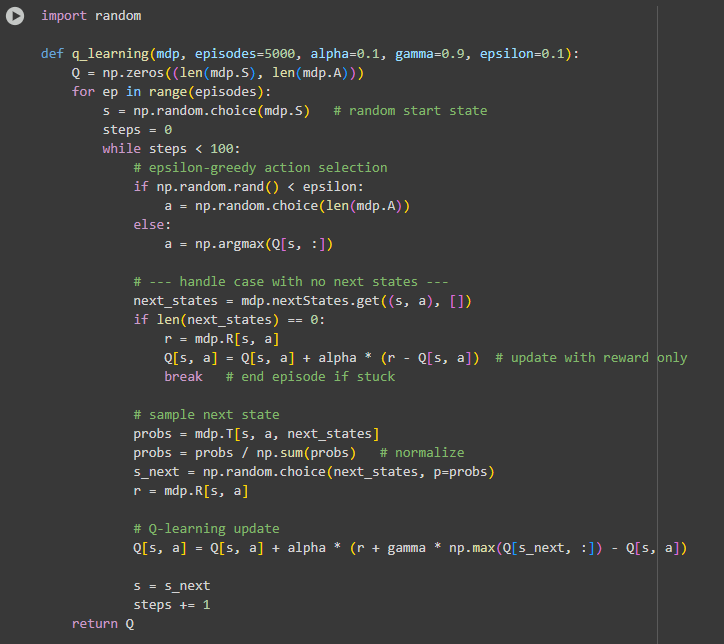